In [109]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [110]:
img = cv2.imread("12.jpg")

In [112]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (17, 17), 32)
blur2 = cv2.GaussianBlur(blur, (17, 17), 32)
inv = cv2.bitwise_not(blur2)
_,thresh = cv2.threshold(inv,180,255,cv2.THRESH_BINARY)
blur3 = cv2.GaussianBlur(thresh, (17, 17), 32)

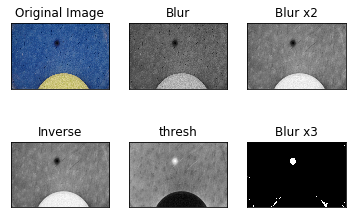

In [113]:
titles = ['Original Image','Blur','Blur x2','Inverse','thresh','Blur x3']
images = [img,gray,blur,blur2,inv,thresh,blur3]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

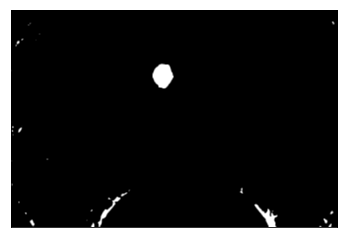

In [114]:
plt.imshow(blur3,'gray')
plt.xticks([]),plt.yticks([])
plt.show()

In [115]:
a=[]
pos=0
_,contours,_ = cv2.findContours(blur3, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for i in contours:
    area = cv2.contourArea(i)
    a.append(area)
    
m = max(a)

for j in range(len(a)):
    if(a[j]==m):
        pos=j

In [116]:
len(contours)

29

In [118]:
c=contours[pos]

In [119]:
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

In [121]:
tl=(0,0)
br=(100,150)

In [126]:
cv2.drawContours(img, contours, pos, (255, 0, 255), 6)
cv2.rectangle(img,tl,br,(255,0,0),3)
cv2.imshow('frame', img)
cv2.waitKey(100000)
cv2.destroyAllWindows()

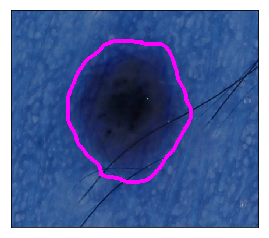

In [127]:
img_final = cv2.imread("final.png")
plt.imshow(img_final)
plt.xticks([]),plt.yticks([])
plt.show()